# Appendix B.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_theme()

from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv and converting the column "Day" to dates
data = pd.read_csv('sea-level-rise.csv')
data['Day'] = pd.to_datetime(data['Day'])
data.head()

,Entity,Code,Day,sea_level_rise_average,sea_level_rise_cw2011,sea_level_rise_uhslcfd
0,World,OWID_WRL,1880-04-15,-183.31406,-183.314063,NaN
1,World,OWID_WRL,1880-07-15,-183.24740,-183.247396,NaN
2,World,OWID_WRL,1880-10-15,-174.14740,-174.147396,NaN
3,World,OWID_WRL,1881-01-15,-159.68073,-159.680729,NaN
4,World,OWID_WRL,1881-04-15,-172.41406,-172.414062,NaN


In [3]:
# Leaving the necessary columns only
# UHSLCFD stands for University of Hawaii Sea Level Center Fast Delivery
df = data[["Day", "sea_level_rise_uhslcfd", "sea_level_rise_average"]]
df.head()

,Day,sea_level_rise_uhslcfd,sea_level_rise_average
0,1880-04-15,NaN,-183.31406
1,1880-07-15,NaN,-183.24740
2,1880-10-15,NaN,-174.14740
3,1881-01-15,NaN,-159.68073
4,1881-04-15,NaN,-172.41406


In [4]:
# Setting dates as index
df.set_index('Day', inplace=True)
df.head()

,sea_level_rise_uhslcfd,sea_level_rise_average
Day,,
1880-04-15,NaN,-183.31406
1880-07-15,NaN,-183.24740
1880-10-15,NaN,-174.14740
1881-01-15,NaN,-159.68073
1881-04-15,NaN,-172.41406


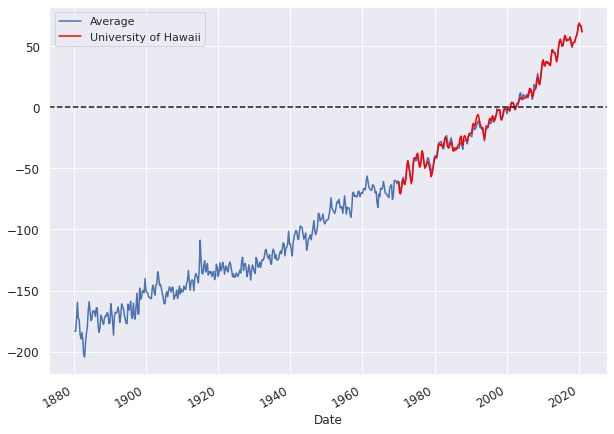

In [5]:
# Plotting the average of the Church & White and the University of Hawaii datasets
ax = df[["sea_level_rise_average"]].plot(legend=None, figsize=(10,7.5), label="Average")
plt.plot(df[["sea_level_rise_uhslcfd"]], "red", label="University of Hawaii")
plt.xlabel("Date")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axhline(0, linestyle='--', color='k')
ax.legend(["Average", "University of Hawaii"])
plt.show()

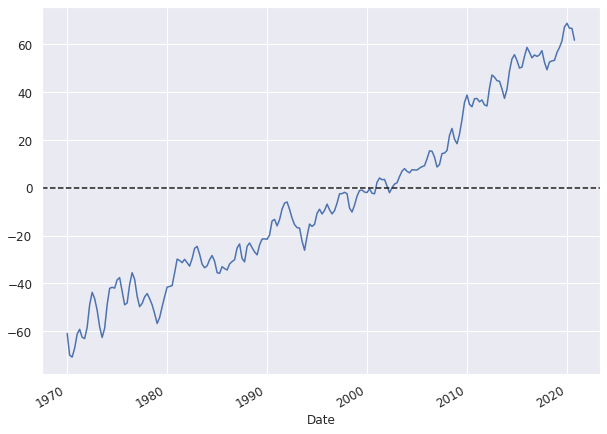

In [6]:
# Plotting the series
ax = df[["sea_level_rise_uhslcfd"]].plot(legend=None, figsize=(10,7.5))
plt.xlabel("Date")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axhline(0, linestyle='--', color='k')
plt.show()

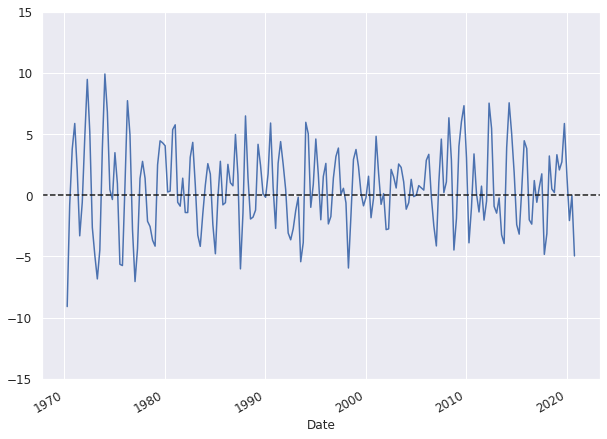

In [7]:
# Differencing to remove linear trend
df["diff"] = df[["sea_level_rise_uhslcfd"]].diff()

# Plotting the first difference
ax = df["diff"].plot(legend=None, figsize=(10,7.5))
plt.xlabel("Date")
plt.ylim(-15, 15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.axhline(0, linestyle='--', color='k')
plt.show()

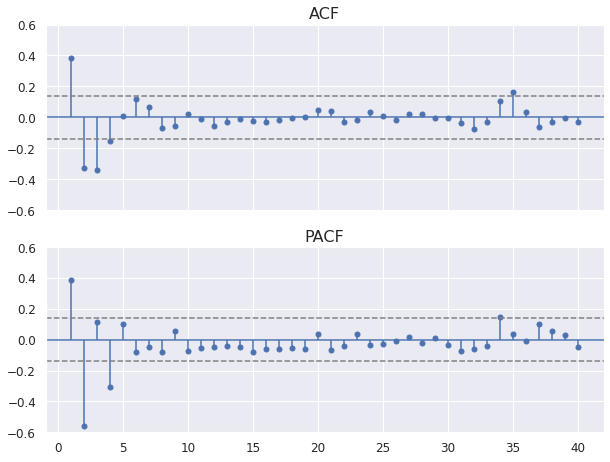

In [9]:
# Plotting the ACF and PACF
fig, axs = plt.subplots(2, figsize=(10,7.5), sharex=True)
plot_acf(df["diff"].dropna(), lags=40, ax=axs[0], alpha=None, zero=False, title="ACF")
plot_pacf(df["diff"].dropna(), lags=40, ax=axs[1], alpha=None, zero=False, title="PACF")
axs[0].set_ylim(-0.6, 0.6)
axs[0].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
axs[1].set_ylim(-0.6, 0.6)
axs[0].set_title("ACF", fontdict = {'fontsize': 16})
axs[1].set_title("PACF", fontdict = {'fontsize': 16})

# "Confidence intervals" computed as done in EViews
axs[0].axhline(y=-1.96/np.sqrt(len(df["diff"].dropna())),linestyle='--',color='gray')
axs[0].axhline(y=1.96/np.sqrt(len(df["diff"].dropna())),linestyle='--',color='gray')
axs[1].axhline(y=-1.96/np.sqrt(len(df["diff"].dropna())),linestyle='--',color='gray')
axs[1].axhline(y=1.96/np.sqrt(len(df["diff"].dropna())),linestyle='--',color='gray')

axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()

### Unit Root and Stationarity Tests

In [10]:
# Here AIC is used to choose the number of lags
# To use SBC, pass autolag="BIC" into the test (the results are virtually the same)
# More on the parameters of the adfuller function: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

# ADF test with no intercept, no trend
adfresult_n = adfuller(df["diff"].dropna(), regression="n")
print('ADF Statistic (no intercept, no trend): %f' % adfresult_n[0])
print('p-value: %f' % adfresult_n[1])
print('Critical Values:')
for key, value in adfresult_n[4].items():
	print('\t%s: %.3f' % (key, value))

# ADF test with intercept only
adfresult_c = adfuller(df["diff"].dropna(), regression="c")
print('\nADF Statistic (intercept only): %f' % adfresult_c[0])
print('p-value: %f' % adfresult_c[1])
print('Critical Values:')
for key, value in adfresult_c[4].items():
	print('\t%s: %.3f' % (key, value))

# ADF test with intercept and trend
adfresult_ct = adfuller(df["diff"].dropna(), regression="ct")
print('\nADF Statistic (intercept and trend): %f' % adfresult_ct[0])
print('p-value: %f' % adfresult_ct[1])
print('Critical Values:')
for key, value in adfresult_ct[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic (no intercept, no trend): -3.400743
p-value: 0.000689
Critical Values:
	1%: -2.578
	5%: -1.943
	10%: -1.615

ADF Statistic (intercept only): -5.211787
p-value: 0.000008
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575

ADF Statistic (intercept and trend): -5.353105
p-value: 0.000045
Critical Values:
	1%: -4.008
	5%: -3.434
	10%: -3.141


In [11]:
# More on the parameters of the kpss function: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html

# KPSS test with intercept only
kpssresult_c = kpss(df["diff"].dropna(), regression="c")
print('KPSS Statistic (intercept only): %f' % kpssresult_c[0])
print('Critical Values:')
for key, value in kpssresult_c[3].items():
	print('\t%s: %.3f' % (key, value))

# KPSS test with intercept and trend
kpssresult_ct = kpss(df["diff"].dropna(), regression="ct")
print('\nKPSS Statistic (intercept and trend): %f' % kpssresult_ct[0])
print('Critical Values:')
for key, value in kpssresult_ct[3].items():
	print('\t%s: %.3f' % (key, value))

KPSS Statistic (intercept only): 0.134127
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

KPSS Statistic (intercept and trend): 0.063955
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


### Univariate linear model identification

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                  203
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -453.289
Date:                Sun, 20 Feb 2022   AIC                            918.579
Time:                        12:04:55   BIC                            938.458
Sample:                    06-30-1970   HQIC                           926.621
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6088      0.148      4.106      0.000       0.318       0.899
ar.L1          0.8343      0.083     10.095      0.000       0.672       0.996
ar.L2         -1.0150      0.091    -11.161      0.0

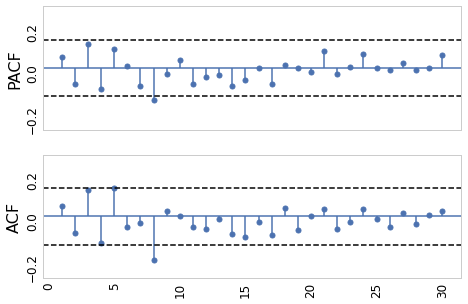

In [12]:
# ARIMA(4,0,0)

series = df[["diff"]].dropna() # Getting the target series
series.index = series.index.to_period('Q') # Setting quarterly frequency

ARIMA4_0_0 = ARIMA(series, order=(4,0,0), trend='c')
model_fit = ARIMA4_0_0.fit()

# Summary of fit model
print(model_fit.summary())

# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=None, figsize=(10,7.5))
plt.show()

# ACF and PACF of residuals
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, figsize=(7.5,5), sharex='all',)
plot_pacf(model_fit.resid, lags=30, ax=axs[1], alpha=None, zero=False, title=None)
plot_acf(model_fit.resid, lags=30, ax=axs[0], alpha=None, zero=False, title=None)
for a in axs:
    a.set_ylim(-0.3, 0.3)
    a.set_xticks([0, 5, 10, 15, 20, 25, 30])
    a.tick_params(axis='both', which='major', labelsize=12)
    a.grid(False)
    a.tick_params(axis='both', labelrotation = 90, colors="black")
    a.yaxis.label.set_color('black')
    # "Confidence intervals" computed as done in EViews
    a.axhline(y=-1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')
    a.axhline(y=1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')


axs[0].set_ylabel("PACF", fontdict = {'fontsize': 16})
axs[1].set_ylabel("ACF", fontdict = {'fontsize': 16})

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                  203
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -404.649
Date:                Sun, 20 Feb 2022   AIC                            821.297
Time:                        12:05:04   BIC                            841.177
Sample:                    06-30-1970   HQIC                           829.340
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6063      0.116      5.210      0.000       0.378       0.834
ma.L1          1.4176      2.251      0.630      0.529      -2.995       5.830
ma.L2         -0.3395      0.967     -0.351      0.7

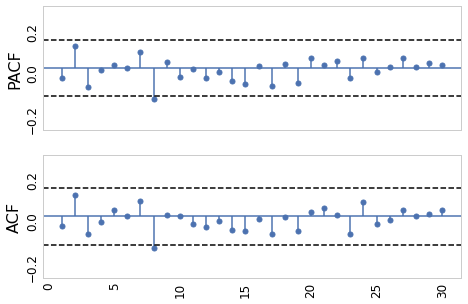

In [13]:
# ARIMA(0,0,4)

ARIMA0_0_4 = ARIMA(series, order=(0,0,4), trend='c')
model_fit = ARIMA0_0_4.fit()

# Summary of fit model
print(model_fit.summary())

# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=None, figsize=(10,7.5))
plt.show()

# ACF and PACF of residuals
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, figsize=(7.5,5), sharex='all',)
plot_pacf(model_fit.resid, lags=30, ax=axs[1], alpha=None, zero=False, title=None)
plot_acf(model_fit.resid, lags=30, ax=axs[0], alpha=None, zero=False, title=None)
for a in axs:
    a.set_ylim(-0.3, 0.3)
    a.set_xticks([0, 5, 10, 15, 20, 25, 30])
    a.tick_params(axis='both', which='major', labelsize=12)
    a.grid(False)
    a.tick_params(axis='both', labelrotation = 90, colors="black")
    a.yaxis.label.set_color('black')
    # "Confidence intervals" computed as done in EViews
    a.axhline(y=-1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')
    a.axhline(y=1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')


axs[0].set_ylabel("PACF", fontdict = {'fontsize': 16})
axs[1].set_ylabel("ACF", fontdict = {'fontsize': 16})


# print(f"Sum of squared residuals {sum(model_fit.resid ** 2)}")

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                  203
Model:                 ARIMA(2, 0, 4)   Log Likelihood                -401.786
Date:                Sun, 20 Feb 2022   AIC                            819.572
Time:                        12:05:23   BIC                            846.078
Sample:                    06-30-1970   HQIC                           830.295
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5987      0.089      6.705      0.000       0.424       0.774
ar.L1          1.2760      0.165      7.749      0.000       0.953       1.599
ar.L2         -0.2944      0.124     -2.371      0.0

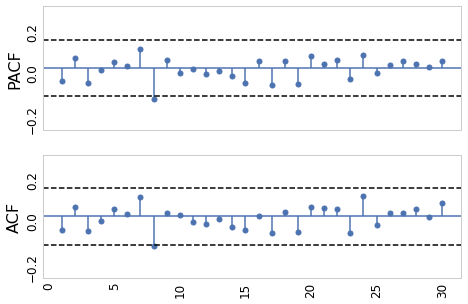

In [14]:
# ARIMA(2,0,4)

ARIMA2_0_4 = ARIMA(series, order=(2,0,4), trend='c')
model_fit = ARIMA2_0_4.fit()

# Summary of fit model
print(model_fit.summary())

# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=None, figsize=(10,7.5))
plt.show()

# ACF and PACF of residuals
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, figsize=(7.5,5), sharex='all',)
plot_pacf(model_fit.resid, lags=30, ax=axs[1], alpha=None, zero=False, title=None)
plot_acf(model_fit.resid, lags=30, ax=axs[0], alpha=None, zero=False, title=None)
for a in axs:
    a.set_ylim(-0.3, 0.3)
    a.set_xticks([0, 5, 10, 15, 20, 25, 30])
    a.tick_params(axis='both', which='major', labelsize=12)
    a.grid(False)
    a.tick_params(axis='both', labelrotation = 90, colors="black")
    a.yaxis.label.set_color('black')
    # "Confidence intervals" computed as done in EViews
    a.axhline(y=-1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')
    a.axhline(y=1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')


axs[0].set_ylabel("PACF", fontdict = {'fontsize': 16})
axs[1].set_ylabel("ACF", fontdict = {'fontsize': 16})


# print(f"Sum of squared residuals {sum(model_fit.resid ** 2)}")

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                  203
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -403.810
Date:                Sun, 20 Feb 2022   AIC                            819.619
Time:                        12:05:35   BIC                            839.499
Sample:                    06-30-1970   HQIC                           827.662
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6052      0.098      6.186      0.000       0.413       0.797
ar.L1          0.3196      0.094      3.417      0.001       0.136       0.503
ma.L1          1.1242      5.525      0.203      0.8

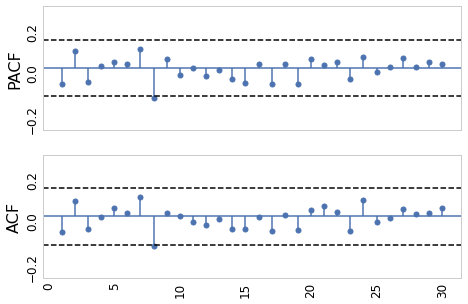

In [15]:
# ARIMA(1,0,3)

ARIMA1_0_3 = ARIMA(series, order=(1,0,3), trend='c')
model_fit = ARIMA1_0_3.fit()

# Summary of fit model
print(model_fit.summary())

# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(legend=None, figsize=(10,7.5))
plt.show()

# ACF and PACF of residuals
with plt.style.context('seaborn-whitegrid'):
    fig, axs = plt.subplots(2, figsize=(7.5,5), sharex='all',)
plot_pacf(model_fit.resid, lags=30, ax=axs[1], alpha=None, zero=False, title=None)
plot_acf(model_fit.resid, lags=30, ax=axs[0], alpha=None, zero=False, title=None)
for a in axs:
    a.set_ylim(-0.3, 0.3)
    a.set_xticks([0, 5, 10, 15, 20, 25, 30])
    a.tick_params(axis='both', which='major', labelsize=12)
    a.grid(False)
    a.tick_params(axis='both', labelrotation = 90, colors="black")
    a.yaxis.label.set_color('black')
    # "Confidence intervals" computed as done in EViews
    a.axhline(y=-1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')
    a.axhline(y=1.96/np.sqrt(len(model_fit.resid)),linestyle='--',color='black')


axs[0].set_ylabel("PACF", fontdict = {'fontsize': 16})
axs[1].set_ylabel("ACF", fontdict = {'fontsize': 16})


# print(f"Sum of squared residuals {sum(model_fit.resid ** 2)}")

In [17]:
# Grid search over AIC
mat_aic = np.empty((11,11))

for p in range(0, 11):
    print(p)
    for q in range(0, 11):
        model = ARIMA(series, order=(p,0,q), trend='c')
        model_fit = model.fit()
        mat_aic[p][q] = model_fit.aic

mat_aic
# print(np.min(np.min(mat_aic, axis=0)))

0
1
2
3
4
5
6
7
8
9
10


In [18]:
pd.DataFrame(mat_aic)

,0,1,2,3,4,5,6,7,8,9,10
0,1070.963904,912.097177,866.190986,826.288411,821.297344,821.564799,842.437183,824.528525,826.673050,842.325797,831.265213
1,1038.801944,907.749156,900.741975,819.619427,823.469128,820.132351,821.492812,822.931741,824.014477,825.963250,827.958177
2,956.566469,867.462518,868.520025,828.958300,819.572279,830.820613,820.770168,821.840868,823.518247,823.870566,825.790513
3,952.643054,869.273931,861.394491,827.689228,821.338567,820.871566,827.070314,822.258443,826.729666,828.259935,827.802003
4,918.578596,846.181145,827.108151,828.251410,840.569807,835.342712,823.509656,827.760700,825.413889,825.254239,828.974314
5,906.544029,847.641063,846.860782,825.026074,824.171455,830.248428,824.479959,827.862194,834.708133,830.964331,833.425895
6,896.541093,847.778224,846.506871,850.070846,826.130173,828.472948,830.267641,828.397415,829.339394,832.764439,835.336655
7,897.367220,849.112436,848.265338,853.198314,850.751502,829.842570,833.426769,829.619192,830.753836,831.562030,834.635234
8,891.216277,841.450219,846.976013,852.536504,850.068821,829.460517,841.063167,828.925929,832.678991,836.276096,832.804741
9,887.465873,841.279921,843.779347,825.711617,846.899601,829.712229,833.107464,833.049610,835.983508,837.310864,838.426496


In [19]:
# Grid search over SBC
mat_bic = np.empty((11,11))

for p in range(0, 11):
    print(p)
    for q in range(0, 11):
        model = ARIMA(series, order=(p,0,q), trend='c')
        model_fit = model.fit()
        mat_bic[p][q] = model_fit.bic

mat_bic
# print(np.min(np.min(mat_bic, axis=0)))

0
1
2
3
4
5
6
7
8
9
10


In [20]:
pd.DataFrame(mat_bic)

,0,1,2,3,4,5,6,7,8,9,10
0,1077.590316,922.036795,879.443810,842.854441,841.176580,844.757241,868.942831,854.347379,859.805110,878.771063,871.023685
1,1048.741562,921.001980,917.308005,839.498662,846.661569,846.637999,851.311665,856.063800,860.459743,865.721721,871.029854
2,969.819293,884.028548,888.399260,852.150742,846.077927,860.639467,853.902228,858.286134,863.276719,866.942244,872.175397
3,969.209084,889.153167,884.586933,854.194876,851.157421,854.003626,863.515580,862.016915,869.801344,874.644819,877.500093
4,938.457832,869.373587,853.613799,858.070264,873.701866,871.787977,863.268128,870.832378,871.798773,874.952329,881.985609
5,929.736470,874.146711,876.679636,858.158134,860.616721,870.006900,867.551637,874.247078,884.406223,883.975627,889.750396
6,923.046741,877.597078,879.638931,886.516112,865.888644,871.544626,876.652525,878.095505,882.350689,889.088940,894.974362
7,927.186074,882.244495,884.710604,892.956786,893.823180,876.227453,883.124859,882.630488,887.078338,891.199737,897.586147
8,924.348337,877.895485,886.734485,895.608182,896.453704,879.158606,894.074462,885.250430,892.316699,899.227010,899.068861
9,923.911138,881.038393,886.851025,872.096501,896.597691,882.723524,889.431966,892.687317,898.934421,903.574983,908.003821
